Copenhagen Business School

MSc in Business Administration and Data Science

Machine Learning & Deep Learning

Mandatory Assignment 2



# Question 1 : SVM and Random Forest

Please download the attached dataset (data.csv), a labelled dataset from the marketing domain of
a fictitious company ABC Limited. The dataset contains the number of impressions on ad platforms
across 81 digital marketing channels. To clarify impressions in this context, assume that impressions
mean the number of times an advertisement is displayed to users. The target label in this dataset is the
last column (Click), which contains a boolean value whether the user has clicked on an advertisement
or not.
Use this data to build a predictive model for deciding whether a user is likely to click on an
advertisement based on the number of impressions on the marketing channels. Use Support Vector
Machine (SVM) and Random Forests for prediction, which can be further used to make better market
predictions in this domain. You might be interested in exploring the data for discrepancies (such as
non-numeric values and some corrupt data, replace them with NA values). You also can check if there
are any outliers (e.g. the number of clicks that are < 0 or ≥1000).



Preparing the data - removing outliers, corrupted values

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
    # For Google Colab
    df = pd.read_csv("/content/drive/MyDrive/CBS/T2 CBS/ML/Datasources/data.csv")
except FileNotFoundError:
    # You'll need to update the path below to where the file is located on your Jupyter Notebook environment
    df = pd.read_csv("path/to/your/data.csv")  # Update this path

In [ ]:
df.head() # Getting familiar with the dataset

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,dmp923122274,0,0,2,0,0,3,6,0,0,...,0,0,0,4,0,0,1,0,1,0
1,dmp458034174,0,3,0,0,0,0,1,0,0,...,0,0,0,12,0,2,2,12,0,0
2,dmp364043571,0,2,0,0,0,0,0,0,2,...,0,0,0,11,0,0,0,0,0,0
3,dmp461339655,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
4,dmp549691332,0,0,0,0,0,5,7,0,0,...,0,0,1,0,0,0,1,0,0,0


From the table above, it's evident that there is at least one column named "Unnamed: 0" containing values such as "dmp923192313" and similar. These values appear to be nonsensical and do not contribute meaningfully to our analysis. Therefore we will remove this column. Removing this column should not impact the performance of our models.



In [ ]:
######## DATA CLEANING ###########
# Let's replace non-numeric values and corrupt data with NaN (NA values) across the DataFrame.
# Replacing non-numeric values and corrupt data with NA values
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df
# So the column "Unnamed: 0" only contains NaN values for now

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,NaN,0,0,2,0,0,3,6,0,0,...,0,0,0,4,0,0,1,0,1,0
1,NaN,0,3,0,0,0,0,1,0,0,...,0,0,0,12,0,2,2,12,0,0
2,NaN,0,2,0,0,0,0,0,0,2,...,0,0,0,11,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
4,NaN,0,0,0,0,0,5,7,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,0,0,0,20,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9996,NaN,0,0,2,0,0,2,0,0,1,...,0,0,1,0,3,0,2,0,0,0
9997,NaN,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,0
9998,NaN,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Print total number of rows and columns in the DataFrame
print(f"Total rows: {df.shape[0]}\nTotal columns: {df.shape[1]}")

# Calculate the number of missing values in each column
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

# Check if there are columns with missing values and print details
if not missing_columns.empty:
    print("Columns with missing values:")
    for column, missing_count in missing_columns.items():
        print(f"-{column}: {missing_count}")
else:
    # No missing values in any column
    print("No missing values found.")

# Count total rows that have any missing values
rows_with_missing = df.isnull().any(axis=1).sum()  # axis=1 checks across columns for each row
if rows_with_missing > 0:
    print(f"Total rows with any missing values: {rows_with_missing}")
else:
    # No missing values in any row
    print("No missing values found in any row.")
print("\n")

Total rows: 10000
Total columns: 83
Columns with missing values:
-Unnamed: 0: 10000
-Diigo: 642
Total rows with any missing values: 10000




In [ ]:
# Removing "unnamed" column since it contains 100% corrupted values which is now N/A.
# No reason to have this column in our dataset for analysis
df = df.drop('Unnamed: 0', axis=1)


In [ ]:
# Dictionary to hold the outliers and counts before replacing
outliers_summary = {}

# Checking for outliers in each column, replacing them with NaN, and store their original values
for column in df.columns:
    outliers = df[(df[column] < 0) | (df[column] >= 1000)][column]
    if not outliers.empty:
        outliers_summary[column] = outliers.values
        # Replace outliers with NaN
        df.loc[(df[column] < 0) | (df[column] >= 1000), column] = np.nan

# Displaying the replaced outliers and their counts
for column, values in outliers_summary.items():
    print(f"Column: {column}, Replaced Outlier Values: {values}, Count: {len(values)}")

Column: Newsvine, Replaced Outlier Values: [96372367637], Count: 1


In [ ]:
# Replacing the N/A values with the mean of the rest of the values in that column
# Doing this because SVC does not accept missing values encoded as NaN natively
# Loop through each column in the DataFrame
for column in df.columns:
    # Calculate the mean of the column, excluding NaN values
    mean_value = df[column].mean(skipna=True)

    # Replace NaN values with the mean
    df[column].fillna(mean_value, inplace=True)

# Print the modified DataFrame
df

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,0,0,2,0,0,3,6,0,0,0,...,0,0,0,4,0,0,1,0,1,0
1,0,3,0,0,0,0,1,0,0,0,...,0,0,0,12,0,2,2,12,0,0
2,0,2,0,0,0,0,0,0,2,0,...,0,0,0,11,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
4,0,0,0,0,0,5,7,0,0,5,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,20,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9996,0,0,2,0,0,2,0,0,1,0,...,0,0,1,0,3,0,2,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,0
9998,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1. Develop supervised machine-learning classifiers as mentioned above, using an 80/20 split for
training to test sets. Use the confusion matrix, precision, recall, f1, support and accuracy to
compare the performance of the algorithms. Apart from that, also carry out Cross-Validation.

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt



In [ ]:
# Splitting the dataset into features (X) and the target label (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column which is "Click"
# Target label here is the one we want to predict

# Splitting the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# By training the model on one set of data (training set) and then testing it on a separate set (testing set),
# we can see how well the model generalizes to new, unseen data. This helps in assessing the predictive performance of the model.

# Training models with pipelines for automatic scaling

# SVM Pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42)) # Kernel = Poly gave us not as good accuracy
svm_pipeline.fit(X_train, y_train)

# Random Forest Pipeline
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
# Evaluating models
# Using the confusion matrix, precision, recall, f1, support and accuracy
models = {'SVM': svm_pipeline, 'Random Forest': rf_pipeline}
for name, pipeline in models.items():
    y_pred = pipeline.predict(X_test)
    print(f"{name} Model Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    # Cross-validation
    scores = cross_val_score(pipeline, X, y, cv=5)
    print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("-"*30)

SVM Model Evaluation:
Confusion Matrix:
 [[1738   23]
 [  28  211]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1761
           1       0.90      0.88      0.89       239

    accuracy                           0.97      2000
   macro avg       0.94      0.93      0.94      2000
weighted avg       0.97      0.97      0.97      2000

Accuracy: 0.9745
Cross-Validation Accuracy: 0.97 (+/- 0.00)
------------------------------
Random Forest Model Evaluation:
Confusion Matrix:
 [[1761    0]
 [ 232    7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      1761
           1       1.00      0.03      0.06       239

    accuracy                           0.88      2000
   macro avg       0.94      0.51      0.50      2000
weighted avg       0.90      0.88      0.83      2000

Accuracy: 0.884
Cross-Validation Accuracy: 0.88 (+/- 0.00)
--

From the evaluation of both models above we can see that:
- SVM model has an overall accuracy of 97.45%.
- The confusion matrix indicates a high number of true positives and true negatives with very few false positives and false negatives, this means that the model is good at both identifying the positive class and avoiding misclassification
- The F1 score is 0.89 for class 1 and 0.99 for class 0 which indicates that the model is likely to generalize unseen data

- The random forest model has a lower overall accuracy of 88.4%.
- The confusion matrix that it perfectly classifies the negative class (class 0) but it performs poorly on the positive class (class 1), with only 7 true positive against 232 false negatives. This result is reflected in a recall of 0.03 for class 1.
- The F1-Score of 0.06 indicates that the model is ineffective at identifying positive cases. However the precision, however it has a precision of 1.00.

To summarize we can conclude that the SVM model outperformed the Random Forest Model, therefore we will continue using the SVM model to answer the remaining questions.

2. Next, create a function to find the five most influential features




In [ ]:
def find_influential_features(pipeline, feature_names): # Using two inputs; pipeline and feature_names

    model = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]
    model_name = model.__class__.__name__

    if model_name == 'RandomForestClassifier':
        importances = model.feature_importances_ # Return an array of values, showing importance of each feature
        features_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        features_df = features_df.sort_values(by='Importance', ascending=False).head(5) #Sorting, using top 5 only
        return features_df

    elif model_name == 'SVC' and model.kernel == 'linear':
        coefficients = model.coef_[0]
        features_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
        features_df['Absolute Coefficient'] = features_df['Coefficient'].abs()
        features_df = features_df.sort_values(by='Absolute Coefficient', ascending=False).head(5) #Sorting, using top 5 only
        return features_df[['Feature', 'Coefficient']]

    else:
        raise ValueError("This function supports only RandomForestClassifier and linear SVC models.")


In [ ]:
feature_names = X.columns.tolist() # Feature Names

# Finding top 5 features for Random Forest
top_features_rf = find_influential_features(rf_pipeline, feature_names)
print("Random Forest Top 5 Features:")
print(top_features_rf)

# Finding top 5 features for SVM
top_features_svm = find_influential_features(svm_pipeline, feature_names)
print("SVM Top 5 Features:")
print(top_features_svm)

Random Forest Top 5 Features:
        Feature  Importance
75    Wordpress    0.037299
69      Typepad    0.036815
31  Livejournal    0.036149
3       Blogger    0.033569
5          Cnet    0.032308
SVM Top 5 Features:
        Feature  Coefficient
75    Wordpress     1.888395
64     Thisnext     1.850971
5          Cnet     1.722651
31  Livejournal     1.710075
38    Mybloglog     1.608513


....and develop a function to plot the most significant predictors by



considering the size of their coefficients.





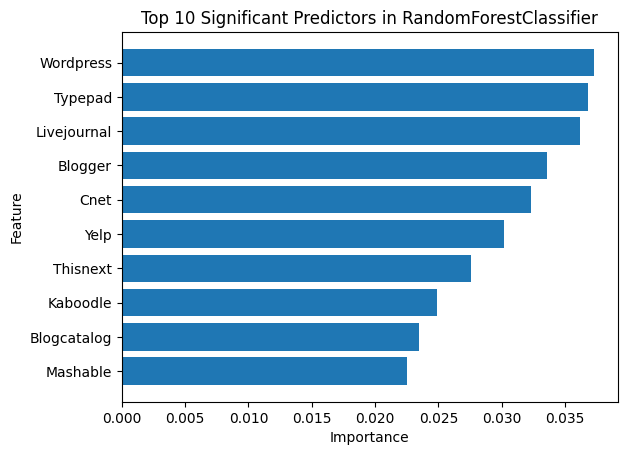

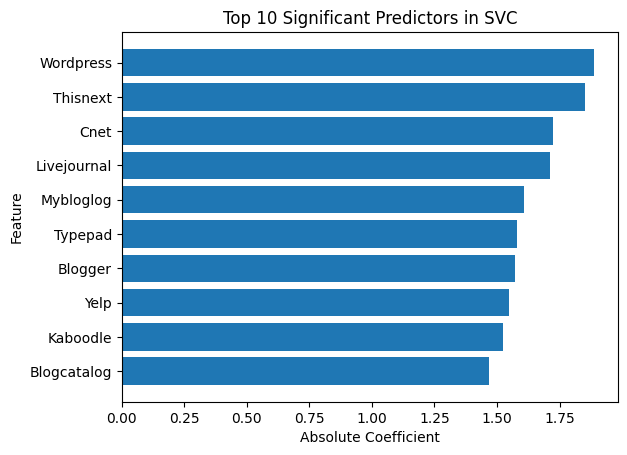

In [ ]:
def plot_significant_predictors(pipeline, feature_names, n_features):

    # Extracting the model from the pipeline
    model = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]
    model_name = model.__class__.__name__

    # Plotting based on model type
    if model_name == 'RandomForestClassifier':
        importances = model.feature_importances_
        features_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        features_df = features_df.sort_values(by='Importance', ascending=False).head(n_features)
        plt.barh(features_df['Feature'], features_df['Importance'])
        plt.xlabel('Importance')

    elif model_name == 'SVC' and model.kernel == 'linear':
        coefficients = model.coef_[0]
        features_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
        features_df['Absolute Coefficient'] = features_df['Coefficient'].abs()
        features_df = features_df.sort_values(by='Absolute Coefficient', ascending=False).head(n_features)
        plt.barh(features_df['Feature'], features_df['Absolute Coefficient'])
        plt.xlabel('Absolute Coefficient')

    else:
        raise ValueError("This function supports only RandomForestClassifier and linear SVC models within pipelines.")

    plt.ylabel('Feature')
    plt.title(f'Top {n_features} Significant Predictors in {model_name}')
    plt.gca().invert_yaxis()  # To display the most important feature on top
    plt.show()

plot_significant_predictors(rf_pipeline, feature_names, 10)
plot_significant_predictors(svm_pipeline, feature_names, 10)

These two plots display the top 10 significant predictors for each model: the SVC and the Random Forest classifier. For instance, WordPress is identified as the most significant predictor in both models, whereas BlogCatalog ranks at 10th place and 9th place.

3. Based on the findings, make a recommendation to the company on which marketing channels
you think the company should use if they would like to use only a few (one or two channels)
---------
Considering the importance of the features we can see that 'Wordpress' has the most importance for both models. Therefore it is evident that they should use this market channel. However, regarding question to include more channels it becomes more complicated to give a definite answer. As we can see in the SVC chart, 'Thisnext' is number two, however in the chart for RFC, 'Typepad' is on second place. But taking account that the SVM models outperforms the RFC model with regards to identify the majority of true positive cases. The SVC model has balance and high scores for both precision and recall for the miniority class, making it more reliable. In conclusion, the company should definitely consider using 'Wordpress' based on its strong predictive power in both models. 'Thisnext' should be considered as the second channel, as it is highly influential in the better-performing SVM model.


4. Furthermore, assuming a linear cost of impression (i.e. pay per impression) is the same across
all channels (e.g. 0.10 DKK per impression), then considering the average costs spent per each
channel


In [ ]:
# Sum Total Impression
total_impressions = df.drop(columns='Click').sum()

# Calculate the total cost by multiplying the impressions by the cost per impression
total_costs = total_impressions * 0.10  # 0.10 DKK per impression

# Calculate the average cost spent per channel
average_cost = total_costs.sum() / len(total_costs)

# Display the average cost
print(f"The average cost spent per channel is: {average_cost} DKK")
# The average cost spent per channel is: 798.2183173960618 DKK

The average cost spent per channel is: 732.5237897580981 DKK


In [ ]:
df

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,0,0,2,0,0,3,6,0,0,0,...,0,0,0,4,0,0,1,0,1,0
1,0,3,0,0,0,0,1,0,0,0,...,0,0,0,12,0,2,2,12,0,0
2,0,2,0,0,0,0,0,0,2,0,...,0,0,0,11,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
4,0,0,0,0,0,5,7,0,0,5,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,20,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9996,0,0,2,0,0,2,0,0,1,0,...,0,0,1,0,3,0,2,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,0
9998,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


...which channel(s) would you recommend if the company would like to minimize their marketing expenses?

Text(0, 0.5, 'Frequency')

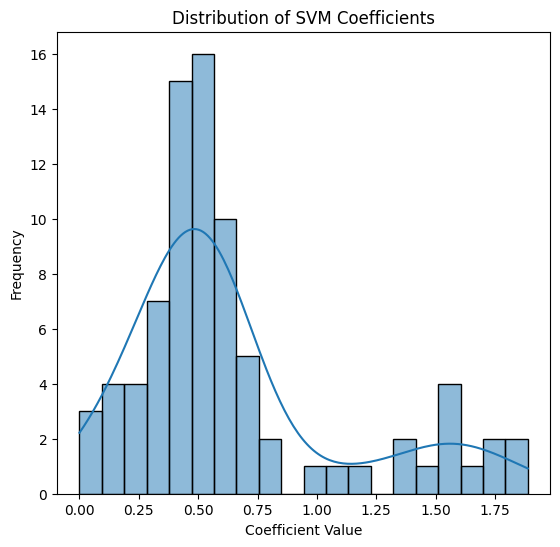

In [ ]:
import seaborn as sns

# Extract coefficients for the SVM model from the pipeline
svm_coefficients = pd.Series(svm_pipeline.named_steps['svc'].coef_[0], index=X.columns)

# Visualization of the coefficient distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(svm_coefficients, bins=20, kde=True)
plt.title('Distribution of SVM Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')

- The Y-axis represents frequency
- The X-axis represent the coefficient value

This is a bar chart representing the range of SVM coefficient values in bins and the height of each bar displays the frequency of the coefficient that is within that bin. Above the bins, there is a KDE plot that estimates the density function of the coefficient values. By looking at this line we can see the overall spread of the coefficients.

The purpose of creating this bar chart is to observe the distribution of coefficients, which will help us determine the threshold for what constitutes a high coefficient value. By understanding this distribution, we can make more informed decisions about which marketing channels may be cost-effective to continue investing in.

We are using SVM because it performed better than the RF Model, as previously explained



In [ ]:
# Extract coefficients for the SVM model from the pipeline
svm_coefficients = pd.Series(svm_pipeline.named_steps['svc'].coef_[0], index=X.columns)

# Comparing these coefficients to the total impressions of each channel
total_impressions = df.drop(columns='Click').sum()

# Convert total impressions to a DataFrame for easier comparison
total_impressions_df = pd.DataFrame(total_impressions, columns=['TotalImpressions']).reset_index()
total_impressions_df.rename(columns={'index': 'Feature'}, inplace=True)

# Convert SVM coefficients to DataFrame for easier comparison
svm_coefficients_df = svm_coefficients.reset_index()
svm_coefficients_df.columns = ['Feature', 'Coefficient']

# Merge the DataFrames for comparison
comparison_df = total_impressions_df.merge(svm_coefficients_df, on='Feature')

# Define thresholds for identifying channels to potentially remove
coefficient_threshold = 1
impression_threshold = comparison_df['TotalImpressions'].quantile(0.25)  # Example: Top 25% impressions

# Identify channels with low SVM coefficients but high impressions
channels_to_consider = comparison_df[
    (comparison_df['Coefficient'].abs() > coefficient_threshold) &
    (comparison_df['TotalImpressions'] > impression_threshold)
]

print("Channels in the lowest 25% of total impressions with coefficients greater than 1:")
print(channels_to_consider[['Feature', 'TotalImpressions', 'Coefficient']])

Channels in the lowest 25% of total impressions with coefficients greater than 1:
        Feature  TotalImpressions  Coefficient
2   Blogcatalog            5681.0     1.469287
3       Blogger           28237.0     1.571553
5          Cnet           19504.0     1.722651
16     Epinions            1816.0     1.130779
27     Kaboodle            2746.0     1.522734
31  Livejournal           16015.0     1.710075
32     Mashable            4245.0     1.340446
38    Mybloglog            3030.0     1.608513
63   Technorati            2751.0     1.210825
64     Thisnext            2019.0     1.850971
69      Typepad            9558.0     1.578330
75    Wordpress           21769.0     1.888395
76        Xanga            4595.0     1.357837
77         Yelp            6022.0     1.547625


In the table above, we can see marketing channels that fall within the lowest 25% in terms of impressions, typically indicating lower costs. Notably, some channels have both low impressions and high coefficients. These channels are cost-effective as they are associated with a significant number of clicks despite fewer impressions.

Therefore, we recommend that ABC Limited continue investing in such marketing channels, which demonstrate efficiency by generating substantial click-through activity at a lower impression volume.

- Blogcatalog with a coefficient of 1.469287 and total impressions of 5681.000000.
- Blogger with a coefficient of 1.571553 and total impressions of 28237.000000.
- Cnet with a coefficient of 1.722651 and total impressions of 19504.000000.
- Epinions with a coefficient of 1.130779 and total impressions of 1816.000000.
- Kaboodle with a coefficient of 1.522734 and total impressions of 2746.000000.
- Livejournal with a coefficient of 1.710075 and total impressions of 16015.000000.
- Mashable with a coefficient of 1.340446 and total impressions of 4245.000000.
- Mybloglog with a coefficient of 1.608513 and total impressions of 3030.000000.
- Technorati with a coefficient of 1.210825 and total impressions of 2751.000000.
- Thisnext with a coefficient of 1.850971 and total impressions of 2019.000000.
- Typepad with a coefficient of 1.578330 and total impressions of 9558.000000.
- Wordpress with a coefficient of 1.888395 and total impressions of 21769.000000.
- Xanga with a coefficient of 1.357837 and total impressions of 4595.000000.
- Yelp with a coefficient of 1.547625 and total impressions of 6022.000000.


# QUESTION 2 - Gradient Descent and Perceptron

1. What is a learner said to do when it outputs a classifier that is 100% accurate on the training
data but only 50% accurate on test data, when in fact it could have output one that is 75%
accurate on both?


When a learner outputs a classifier that is 100% accurate on the training data, but only 50% accurate on test data, it is called overfitting. Overfitting occurs when a model learns the training data too well, taking its noise and outliers as a valid pattern. It could also occur, as a result of insufficient training data.
Being 75% accurate on both training- and test data would be preferable, as the goal is to generalize accurately based on the training data to any new data.

2. In stochastic gradient descent, each pass over the dataset requires the same number of arithmetic operations, whether we use mini-batches of size one or size 1000. Why can it nevertheless
be more computationally efficient to use mini-batches of size 1000?

When it comes to vectorization, it is better to process multiple data points in parallel. Operations on a mini-batch of size 1000 can be performed much faster than 1000 operations on mini-batches of size 1. Besides, when using larger mini-batches in stochastic gradient descent, each gradient calculation is based on more data points. As a result, the estimated gradient is generally closer to the true gradient of the entire dataset. Also, when each mini-batch consists of just one data point, the updates are extremely sensitive to that single example. This can result in a lot of noise in the learning process. With larger mini-batches, the influence of any single data point is reduced, as the gradient is averaged over many examples.


3. Below Figure 1 shows the level curves in the weight space of a cost function C which we are
trying to minimize. The current weight vector is marked by an x. Sketch the gradient descent
update.

Hint: We haven’t given you enough information to determine the magnitude, so we want
you to correct the direction.


The step we are taking is the steepest descent

 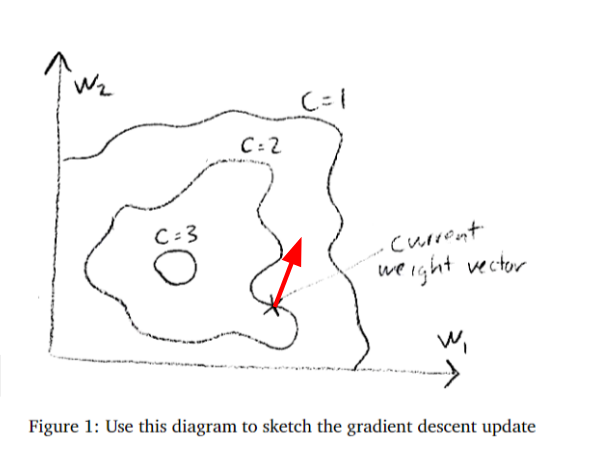

4. Suppose we want to train a perceptron (refer to Figure 2) with weights w1 and w2 and a fixed
bias b = −1 Sketch the constraints in weight space corresponding to the following training
cases.

Hint: The decision boundaries have already been drawn for you, so you only need to draw
arrows to indicate the half-spaces.) Shade the feasible region or indicate that none exists

Pink area
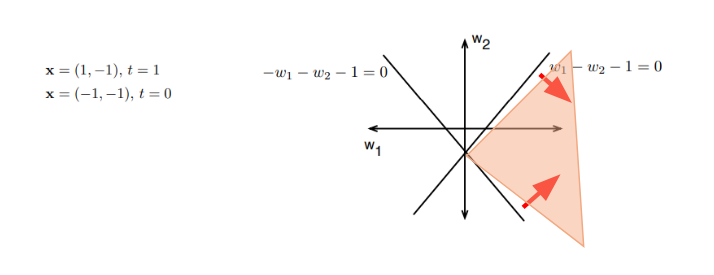

# QUESTION 3 - Neural Networks
The following is a network (refer to Figure 3) of linear neurons, that is, neurons whose output is
identical to their net input. The numbers in the circles indicate the outcome of a neuron, and the
numbers at connections indicate the value of the corresponding weight.

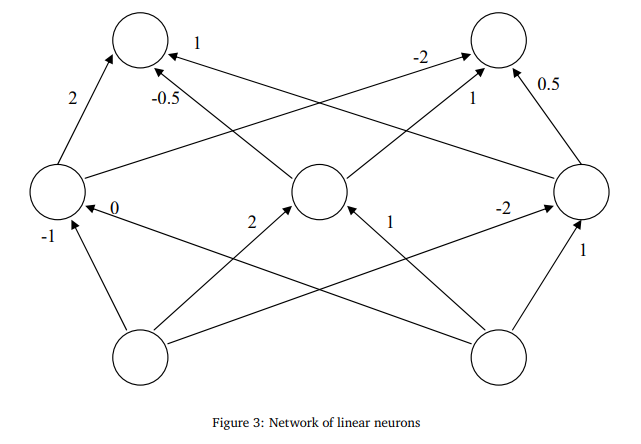

1. Compute the output of the hidden layer and the output-layer neurons for the given input (0.5,
1) and enter those values into the corresponding circles

In [ ]:
def neural_network_output(input_values, weights_input_hidden, weights_hidden_output):

    # Calculate the output of the hidden layer neurons
    hidden_layer_outputs = [
        sum(i * w for i, w in zip(input_values, weight)) for weight in weights_input_hidden
    ]

    # Calculate the output for each of the output layer neurons
    output_layer_outputs = [
        sum(h * w for h, w in zip(hidden_layer_outputs, weights)) for weights in weights_hidden_output
    ]

    return output_layer_outputs
#[-1, 0]
weights_input_to_hidden_example = [[-1, 2], [2, 1], [-2, 1]]
weights_hidden_to_output_example = [[2, -0.5, 1], [-2, 1, 0.5]]



In [ ]:
input_values_1 = [0.5, 1]
neural_network_output(input_values_1, weights_input_to_hidden_example, weights_hidden_to_output_example)

[2.0, -1.0]

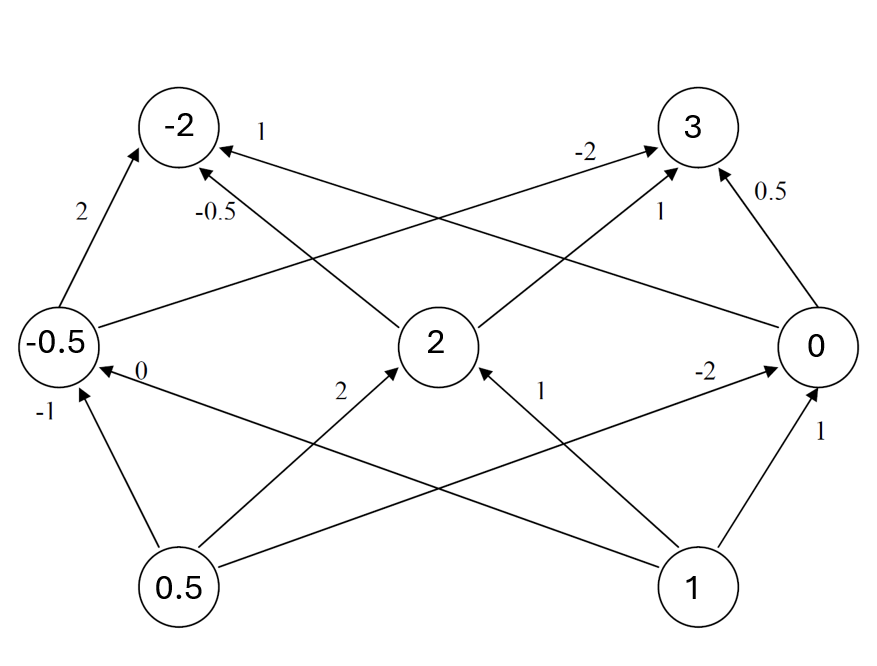

2. What is the network output for the input (1, 2) (i.e., the left input neuron having the value one
and the right one having the value 2)? Do you have to do all the network computations once
again to answer this question? Explain why you do or do not have to do this

In [ ]:
input_values_2 = [1, 2]
neural_network_output(input_values_2, weights_input_to_hidden_example, weights_hidden_to_output_example)

[4.0, -2.0]

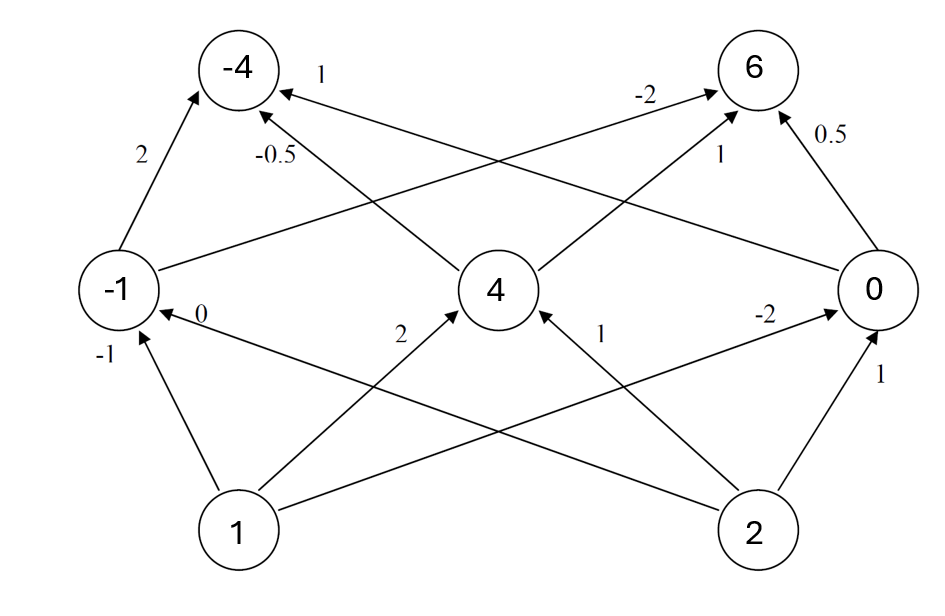

The calculation in this question is, as the question implies, superfluous. As the weights remain constant, the output will follow the same linear relationship for all inputs, given the input pairs share the same relation. In short, if the pairs of input values follow a linear relationship, the output values will also follow a linear relationship. In our case, the output value on the left will always be the left input value multiplied by -4, and the output on the right will be 3 times the input value to the right.

# QUESTION 4 - Written Assignment
Write an extended abstract of two pages to discuss the importance of machine learning in the development of autonomous cars.

The report must reflect on the capabilities and limitations of machine learning in applying it to
the development of autonomous cars. It must also include your reflections and critical comments,
rather than simply reproducing what you found in the literature review.

Your report should conform to the APA 7th edition referencing/citation style.


# Machine Learning in Development of Autonomous Cars

The development of autonomous cars represents a paradigm shift in transportation. It is  promising safer, more efficient, and convenient mobility solutions. To achieve  this transformation, machine learning techniques is one of the central techniques. Machine learning have emerged as tool in enabling autonomous systems to perceive, interpret, and navigate complex environments (Vishnukumar et al. 2017).
Machine learning serves as the cornerstone of autonomous car technology, empowering vehicles to acquire knowledge and improve performance through experience. By leveraging vast amounts of data collected from sensors, cameras, and other sources, machine learning algorithms enable cars to perceive their surroundings with unprecedented accuracy and respond to dynamic situations in real-time (Singh et al. 2021). By Identifying pedestrians, recognizing traffic signs, or predicting the behavior of other vehicles, machine learning equips autonomous cars with the capabilities necessary to navigate challenging scenarios (Vishnukumar et al. 2017).

Furtheron, (Rana et al. 2018) in the Review on Machine learning based Algorithms used in Autonomous cars, delves into the nuances of various machine learning-based algorithms employed in autonomous vehicles, and it highlights 5 most commonly used tehniques.

1. Unsupervised learning algorithms analyze and categorize interaction patterns within autonomous driving without labeled data. By collecting data from sensors in larger datasets,
They uncover hidden structures or patterns in large datasets collected from sensors, which enables better decision-making. (Rana et al., 2018).

2. Decision-based Matrices focus on making decisions for trajectory planning, obstacle avoidance, and lane-keeping based on predefined criteria. By evaluating factors like sensor data and road conditions matrices ensure safe and efficient navigation of autonomous vehicles (Rana et al., 2018).

3. Cluster-based Algorithms are utilized for object detection, localization, and environment mapping, these algorithms cluster sensor data to identify and track objects such as vehicles, pedestrians, and obstacles. They enhance perception and situational awareness for safe navigation (Rana et al., 2018).

4. Pattern Detection Algorithms predict traffic, model behavior, and detect anomalies by examining historical and real-time data. They enable autonomous vehicles to adapt preemptively, enhancing safety and optimizing road operations (Rana et al., 2018).

5. Regression-based Algorithms are employed for tasks like trajectory prediction, speed control, and route optimization, these algorithms model the relationship between input and continuous output variables. They enhance control and motion planning capabilities for adaptive navigation in diverse conditions (Rana et al., 2018).

Although machine learning has great potential for improving autonomous vehicle technology, it also has some drawbacks and limitations. For example, relying on large datasets to train these algorithms can be resource-intensive and may fail to capture the complexities of real-world driving scenarios. Furthermore, the interpretability of machine learning models remains an issue, as black-box algorithms may lack transparency in their decision-making processes, raising safety concerns.


Furthermore, while machine learning algorithms excel at certain tasks, such as object detection and behaviour understanding, they may struggle with rare or novel situations that they were not trained for. This limitation emphasises the importance of robustness testing and continuous learning mechanisms in ensuring autonomous vehicles' reliability and safety in a variety of environments.

In conclusion, while machine learning holds promise for revolutionizing autonomous car technology, it is essential to acknowledge its limitations and actively address challenges related to data quality, model interpretability, and adaptability to novel situations. By critically assessing these factors, stakeholders can foster responsible innovation and accelerate the development of safer and more reliable autonomous vehicles.

# References
Rana, K., & Kaur, P. (2018). Review on Machine Learning Based Algorithms Used in Autonomous Cars. '*International Journal of Emerging Technologies and Innovative Research (JETIR), 5(10), 114-118'*. https://ssrn.com/abstract=3708283

Singh, S., & Saini, B. S. (2021). Autonomous cars: Recent developments, challenges, and possible solutions. *'IOP Conference Series: Materials Science and Engineering, 1022(1)'*, 012028. IOP Publishing. https://doi.org/10.1088/1757-899X/1022/1/012028

Vishnukumar, H. J., Butting, B., Muller, C., & Sax, E. (2017). Machine learning and deep neural network - Artificial intelligence core for lab and real-world test and validation for ADAS and autonomous vehicles: AI for efficient and quality test and validation. *'2017 Intelligent Systems Conference (IntelliSys)'*, 714–721. https://doi.org/10.1109/IntelliSys.2017.8324372
